In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale, StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
import networkx as nx
import pydot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot
from IPython.display import Image
import tensorflow as tf
from tensorflow.keras.models import model_from_json
from keras_sequential_ascii import keras2ascii
from draw_neural_net import draw_neural_net


ModuleNotFoundError: No module named 'draw_neural_net'

In [2]:
df = pd.read_csv("csv_result-chronic_kidney_disease_full.csv")
df= df.rename(columns = lambda x:x.strip("'"))
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,?,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,2,7,50,1.020,4,0,?,normal,notpresent,notpresent,...,38,6000,?,no,no,no,good,no,no,ckd
2,3,62,80,1.010,2,3,normal,normal,notpresent,notpresent,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,4,48,70,1.005,4,0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51,80,1.010,2,0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,397,42,70,1.025,0,0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,398,12,80,1.020,0,0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,399,17,60,1.025,0,0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
df.replace('?', -1, inplace=True)
df.replace('normal', 1, inplace=True)
df.replace('abnormal', 0, inplace=True)
df.replace('present', 1, inplace=True)
df.replace('notpresent', 0, inplace=True)
df.replace('yes', 1, inplace=True)
df.replace('no', 0, inplace=True)
df.replace('good', 1, inplace=True)
df.replace('poor', 0, inplace=True)
df.replace('ckd', 1, inplace=True)
df.replace('notckd', 0, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48,80,1.020,1,0,-1,1,0,0,...,44,7800,5.2,1,1,0,1,0,0,1
1,2,7,50,1.020,4,0,-1,1,0,0,...,38,6000,-1,0,0,0,1,0,0,1
2,3,62,80,1.010,2,3,1,1,0,0,...,31,7500,-1,0,1,0,0,0,1,1
3,4,48,70,1.005,4,0,1,0,1,0,...,32,6700,3.9,1,0,0,0,1,1,1
4,5,51,80,1.010,2,0,1,1,0,0,...,35,7300,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55,80,1.020,0,0,1,1,0,0,...,47,6700,4.9,0,0,0,1,0,0,0
396,397,42,70,1.025,0,0,1,1,0,0,...,54,7800,6.2,0,0,0,1,0,0,0
397,398,12,80,1.020,0,0,1,1,0,0,...,49,6600,5.4,0,0,0,1,0,0,0
398,399,17,60,1.025,0,0,1,1,0,0,...,51,7200,5.9,0,0,0,1,0,0,0


In [4]:
df = df.astype({
    'id': 'int64',
    'age': 'int64',
    'bp': 'int64',
    'sg': 'float64',
    'al': 'int64',
    'su': 'int64',
    'rbc': 'category',
    'pc': 'category',
    'pcc': 'category',
    'ba': 'category',
    'bgr': 'float64',
    'bu': 'float64',
    'sc': 'float64',
    'sod': 'float64',
    'pot': 'float64',
    'hemo': 'float64',
    'pcv': 'int64',
    'wbcc': 'int64',
    'rbcc': 'float64',
    'htn': 'category',
    'dm': 'category',
    'cad': 'category',
    'appet': 'category',
    'pe': 'category',
    'ane': 'category',
    'class': 'category',
 
})

In [5]:
df.replace( -1,np.nan, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,1,0,0,...,44.0,7800.0,5.2,1,1,0,1,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,NaN,1,0,0,...,38.0,6000.0,NaN,0,0,0,1,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,NaN,0,1,0,0,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,0,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.9,0,0,0,1,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.2,0,0,0,1,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.4,0,0,0,1,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.9,0,0,0,1,0,0,0


In [6]:
# converting NaN to means and most common values

for column in df:
    if df[column].dtype== 'float64'or df[column].dtype== 'int64':
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    if df[column].dtype =='category':
        most_common_value = df[column].mode()[0]
        df[column].fillna(most_common_value, inplace=True)
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.200000,1,1,0,1,0,0,1
1,2,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.707435,0,0,0,1,0,0,1
2,3,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.707435,0,1,0,0,0,1,1
3,4,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.900000,1,0,0,0,1,1,1
4,5,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.600000,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,396,55.0,80.0,1.020,0.0,0.0,1,1,0,0,...,47.0,6700.0,4.900000,0,0,0,1,0,0,0
396,397,42.0,70.0,1.025,0.0,0.0,1,1,0,0,...,54.0,7800.0,6.200000,0,0,0,1,0,0,0
397,398,12.0,80.0,1.020,0.0,0.0,1,1,0,0,...,49.0,6600.0,5.400000,0,0,0,1,0,0,0
398,399,17.0,60.0,1.025,0.0,0.0,1,1,0,0,...,51.0,7200.0,5.900000,0,0,0,1,0,0,0


In [26]:
X = df.iloc[:,1:-1]
y = df.iloc[:,25]
x_train,x_test,y_train, y_test = train_test_split(X,y,test_size = 0.330,random_state=12)
y

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: class, Length: 400, dtype: category
Categories (2, int64): [0, 1]

In [27]:
model = Sequential()
model.add(Dense(12, input_shape=(24,), activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [28]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])


In [29]:
model.fit(x_train, y_train, epochs=1000, batch_size=20)


Epoch 1/1000
14/14 [==============================] - 0s 567us/step - loss: 65.7641 - accuracy: 0.6418
Epoch 2/1000
14/14 [==============================] - 0s 608us/step - loss: 60.9026 - accuracy: 0.6418
Epoch 3/1000
14/14 [==============================] - 0s 662us/step - loss: 56.1568 - accuracy: 0.6418
Epoch 4/1000
14/14 [==============================] - 0s 568us/step - loss: 51.4629 - accuracy: 0.6418
Epoch 5/1000
14/14 [==============================] - 0s 606us/step - loss: 46.9431 - accuracy: 0.6418
Epoch 6/1000
14/14 [==============================] - 0s 537us/step - loss: 42.5898 - accuracy: 0.6418
Epoch 7/1000
14/14 [==============================] - 0s 509us/step - loss: 38.1980 - accuracy: 0.6418
Epoch 8/1000
14/14 [==============================] - 0s 501us/step - loss: 34.0616 - accuracy: 0.6418
Epoch 9/1000
14/14 [==============================] - 0s 451us/step - loss: 29.9869 - accuracy: 0.6418
Epoch 10/1000
14/14 [==============================] - 0s 468us/step - lo

14/14 [==============================] - 0s 560us/step - loss: 0.6005 - accuracy: 0.6194
Epoch 160/1000
14/14 [==============================] - 0s 464us/step - loss: 0.6025 - accuracy: 0.6642
Epoch 161/1000
14/14 [==============================] - 0s 422us/step - loss: 0.5913 - accuracy: 0.6567
Epoch 162/1000
14/14 [==============================] - 0s 473us/step - loss: 0.5680 - accuracy: 0.6530
Epoch 163/1000
14/14 [==============================] - 0s 500us/step - loss: 0.5647 - accuracy: 0.6679
Epoch 164/1000
14/14 [==============================] - 0s 426us/step - loss: 0.5787 - accuracy: 0.6567
Epoch 165/1000
14/14 [==============================] - 0s 476us/step - loss: 0.5627 - accuracy: 0.6754
Epoch 166/1000
14/14 [==============================] - 0s 431us/step - loss: 0.5607 - accuracy: 0.6679
Epoch 167/1000
14/14 [==============================] - 0s 476us/step - loss: 0.5924 - accuracy: 0.6343
Epoch 168/1000
14/14 [==============================] - 0s 478us/step - loss: 0

14/14 [==============================] - 0s 468us/step - loss: 0.4373 - accuracy: 0.7463
Epoch 316/1000
14/14 [==============================] - 0s 429us/step - loss: 0.3950 - accuracy: 0.7948
Epoch 317/1000
14/14 [==============================] - 0s 421us/step - loss: 0.3831 - accuracy: 0.8731
Epoch 318/1000
14/14 [==============================] - 0s 462us/step - loss: 0.4096 - accuracy: 0.8060
Epoch 319/1000
14/14 [==============================] - 0s 429us/step - loss: 0.3903 - accuracy: 0.8358
Epoch 320/1000
14/14 [==============================] - 0s 508us/step - loss: 0.3845 - accuracy: 0.8358
Epoch 321/1000
14/14 [==============================] - 0s 482us/step - loss: 0.3846 - accuracy: 0.8619
Epoch 322/1000
14/14 [==============================] - 0s 522us/step - loss: 0.3775 - accuracy: 0.8470
Epoch 323/1000
14/14 [==============================] - 0s 427us/step - loss: 0.3944 - accuracy: 0.8358
Epoch 324/1000
14/14 [==============================] - 0s 486us/step - loss: 0

Epoch 394/1000
14/14 [==============================] - 0s 475us/step - loss: 0.3445 - accuracy: 0.8731
Epoch 395/1000
14/14 [==============================] - 0s 420us/step - loss: 0.3480 - accuracy: 0.8806
Epoch 396/1000
14/14 [==============================] - 0s 467us/step - loss: 0.3711 - accuracy: 0.8358
Epoch 397/1000
14/14 [==============================] - 0s 440us/step - loss: 0.3459 - accuracy: 0.8731
Epoch 398/1000
14/14 [==============================] - 0s 434us/step - loss: 0.3405 - accuracy: 0.8955
Epoch 399/1000
14/14 [==============================] - 0s 459us/step - loss: 0.3599 - accuracy: 0.8470
Epoch 400/1000
14/14 [==============================] - 0s 429us/step - loss: 0.3599 - accuracy: 0.8358
Epoch 401/1000
14/14 [==============================] - 0s 466us/step - loss: 0.3394 - accuracy: 0.8843
Epoch 402/1000
14/14 [==============================] - 0s 431us/step - loss: 0.3383 - accuracy: 0.8769
Epoch 403/1000
14/14 [==============================] - 0s 419us

Epoch 551/1000
14/14 [==============================] - 0s 475us/step - loss: 0.2756 - accuracy: 0.9067
Epoch 552/1000
14/14 [==============================] - 0s 437us/step - loss: 0.2835 - accuracy: 0.9030
Epoch 553/1000
14/14 [==============================] - 0s 439us/step - loss: 0.2869 - accuracy: 0.8843
Epoch 554/1000
14/14 [==============================] - 0s 474us/step - loss: 0.2856 - accuracy: 0.8881
Epoch 555/1000
14/14 [==============================] - 0s 443us/step - loss: 0.2744 - accuracy: 0.8993
Epoch 556/1000
14/14 [==============================] - 0s 474us/step - loss: 0.2774 - accuracy: 0.8993
Epoch 557/1000
14/14 [==============================] - 0s 429us/step - loss: 0.2809 - accuracy: 0.9104
Epoch 558/1000
14/14 [==============================] - 0s 461us/step - loss: 0.2778 - accuracy: 0.9067
Epoch 559/1000
14/14 [==============================] - 0s 439us/step - loss: 0.2751 - accuracy: 0.8881
Epoch 560/1000
14/14 [==============================] - 0s 448us

14/14 [==============================] - 0s 440us/step - loss: 0.2510 - accuracy: 0.8993
Epoch 708/1000
14/14 [==============================] - 0s 478us/step - loss: 0.2411 - accuracy: 0.9067
Epoch 709/1000
14/14 [==============================] - 0s 420us/step - loss: 0.2493 - accuracy: 0.8955
Epoch 710/1000
14/14 [==============================] - 0s 453us/step - loss: 0.2558 - accuracy: 0.9179
Epoch 711/1000
14/14 [==============================] - 0s 442us/step - loss: 0.2400 - accuracy: 0.9104
Epoch 712/1000
14/14 [==============================] - 0s 465us/step - loss: 0.2341 - accuracy: 0.9179
Epoch 713/1000
14/14 [==============================] - 0s 414us/step - loss: 0.2431 - accuracy: 0.9142
Epoch 714/1000
14/14 [==============================] - 0s 414us/step - loss: 0.2453 - accuracy: 0.9179
Epoch 715/1000
14/14 [==============================] - 0s 438us/step - loss: 0.2303 - accuracy: 0.9216
Epoch 716/1000
14/14 [==============================] - 0s 420us/step - loss: 0

14/14 [==============================] - 0s 491us/step - loss: 0.2043 - accuracy: 0.9328
Epoch 864/1000
14/14 [==============================] - 0s 446us/step - loss: 0.2068 - accuracy: 0.9254
Epoch 865/1000
14/14 [==============================] - 0s 483us/step - loss: 0.2187 - accuracy: 0.9179
Epoch 866/1000
14/14 [==============================] - 0s 435us/step - loss: 0.2031 - accuracy: 0.9179
Epoch 867/1000
14/14 [==============================] - 0s 490us/step - loss: 0.2124 - accuracy: 0.9291
Epoch 868/1000
14/14 [==============================] - 0s 442us/step - loss: 0.2046 - accuracy: 0.9254
Epoch 869/1000
14/14 [==============================] - 0s 460us/step - loss: 0.2277 - accuracy: 0.9030
Epoch 870/1000
14/14 [==============================] - 0s 429us/step - loss: 0.2082 - accuracy: 0.9067
Epoch 871/1000
14/14 [==============================] - 0s 417us/step - loss: 0.2001 - accuracy: 0.9291
Epoch 872/1000
14/14 [==============================] - 0s 462us/step - loss: 0

In [30]:
# import matplotlib.pyplot as plt

# # Train your model and obtain the history object
# history = model.fit(x_train, y_train, epochs=100,batch_size=20, validation_data=(x_test, y_test))

# # Get the loss values from the history object
# train_loss = history.history['loss']
# val_loss = history.history['val_loss']

# # Get the number of epochs
# epochs = range(1, len(train_loss) + 1)

# # Plot the loss values
# plt.plot(epochs, train_loss, label='Train Loss')
# plt.plot(epochs, val_loss, label='Validation Loss')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.legend()
# plt.savefig('epoches.png')
# plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


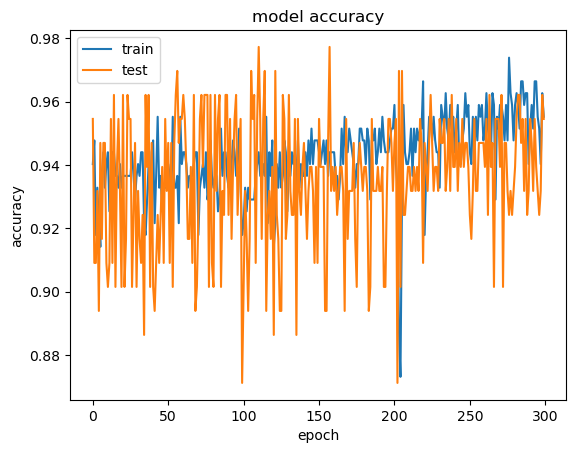

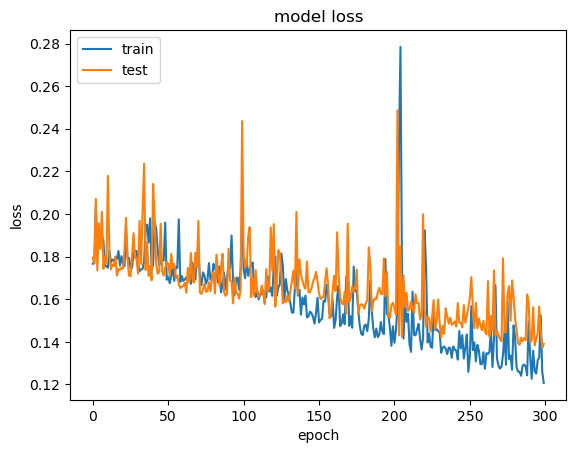

In [31]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=300, batch_size=20, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Loss.png')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('accuracy.png')
plt.show()

In [32]:

_, accuracy = model.evaluate(x_test, y_test)
model.summary()
predictions = model.predict(x_test)
rounded = [round(x[0]) for x in predictions]
confusion = confusion_matrix(rounded, y_test)
print("Accuracy: "+str(accuracy))
print("Confusion: "+str(confusion))

5/5 [==============================] - 0s 733us/step - loss: 0.1390 - accuracy: 0.9545
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                300       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________
5/5 [==============================] - 0s 502us/step
Accuracy: 0.9545454382896423
Confusion: [[53  5]
 [ 1 73]]


In [33]:
keras2ascii(model)

           OPERATION           DATA DIMENSIONS   WEIGHTS(N)   WEIGHTS(%)

               Input   #####          24
               Dense   XXXXX -------------------       300    72.6%
                relu   #####          12
               Dense   XXXXX -------------------       104    25.2%
                relu   #####           8
               Dense   XXXXX -------------------         9     2.2%
             sigmoid   #####           1


In [11]:

dot = model_to_dot(model, show_shapes=True, show_layer_names=True)
dot.format = 'png'
dot_filename = 'model_graph.png'
with open(dot_filename, 'wb') as f:
    f.write(dot.create(format='png'))

Image(dot_filename)
model.save('model.h5')

# Load the model from the saved file
loaded_model = tf.keras.models.load_model('model.h5')

# Convert the loaded model to JSON format
model_json = loaded_model.to_json()

# Save the model in JSON format
with open('model.json', 'w') as json_file:
    json_file.write(model_json)

In [147]:
_, accuracy = model.evaluate(x_test, y_test)
print(accuracy)
model.summary()

4/4 [==============================] - 0s 771us/step - loss: 0.2514 - accuracy: 0.8900
0.8899999856948853
Model: "sequential_318"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_819 (Dense)           (None, 12)                300       
                                                                 
 dense_820 (Dense)           (None, 8)                 104       
                                                                 
 dense_821 (Dense)           (None, 1)                 9         
                                                                 
Total params: 413
Trainable params: 413
Non-trainable params: 0
_________________________________________________________________


In [131]:
predictions = model.predict(x_test)
rounded = [round(x[0]) for x in predictions]

4/4 [==============================] - 0s 612us/step


In [132]:
confusion = confusion_matrix(rounded, y_test)
confusion

array([[33,  1],
       [ 0, 66]])

In [26]:
confusion = confusion_matrix(rounded, y_test)
confusion

array([[14,  0],
       [25, 81]])

In [155]:

epochs = [10,30,50,70,100,120]
batch_sizes = [16, 32, 45,64]
learning_rates = [0.00005,0.0001,0.001]

best_accuracy = 0
best_epoch = 0
best_batch_size = 0
best_rate = 0
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=8)

# Iterate over combinations
for epoch in epochs:
    for batch_size in batch_sizes:
        for rate in learning_rates:
            # Create a new instance of your neural network model
            model = Sequential()
            model.add(Dense(12, input_shape=(24,), activation='relu'))
            model.add(Dense(8, activation='relu'))
            model.add(Dense(1, activation='sigmoid'))
            optimizer = tf.keras.optimizers.Adam(learning_rate=rate)
            # Compile the model
            model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

            # Train the model
            model.fit(x_train, y_train, epochs=epoch, batch_size=batch_size, verbose=0)

            # Evaluate the model on the validation set
            _, accuracy = model.evaluate(x_val, y_val, verbose=0)

            # Check if this combination gives better accuracy
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_epoch = epoch
                best_batch_size = batch_size
                best_rate = rate

print("Best Epoch:", best_epoch)
print("Best Batch Size:", best_batch_size)
print("Best Accuracy:", best_accuracy)
print("Best Rate:", best_rate)



Best Epoch: 50
Best Batch Size: 16
Best Accuracy: 0.987500011920929
Best Rate: 0.001


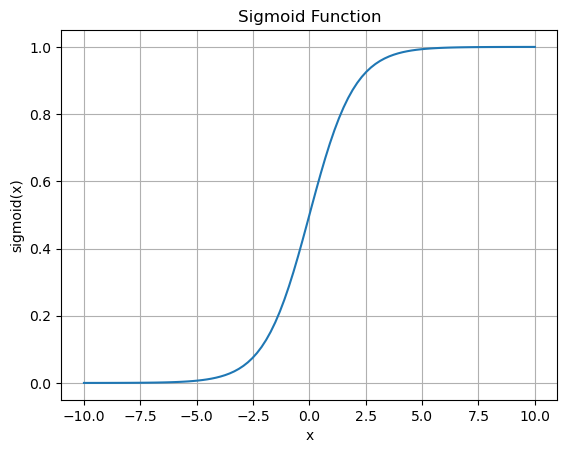

In [50]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Generate values for x
x = np.linspace(-10, 10, 100)

# Compute sigmoid function for each x value
y = sigmoid(x)

# Plot the sigmoid function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.title('Sigmoid Function')
plt.grid(True)
plt.savefig('sigmoid.png')
plt.show()


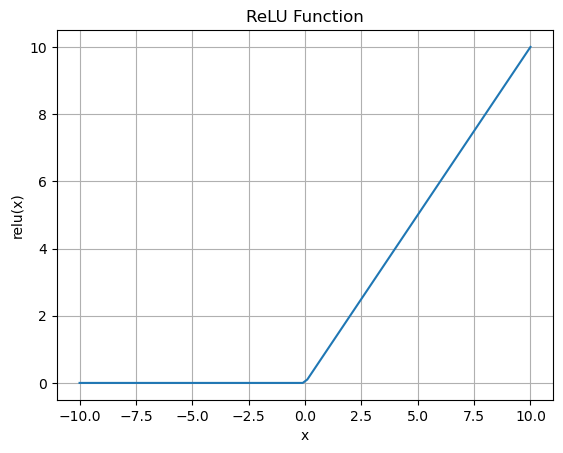

In [51]:

def relu(x):
    return np.maximum(0, x)

# Generate values for x
x = np.linspace(-10, 10, 100)

# Compute ReLU function for each x value
y = relu(x)

# Plot the ReLU function
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('relu(x)')
plt.title('ReLU Function')
plt.grid(True)
plt.savefig('relu.png')

plt.show()

Epoch 1/10
10/10 [==============================] - 0s 4ms/step - loss: 0.9097 - accuracy: 0.7688 - val_loss: 0.8332 - val_accuracy: 0.8125
Epoch 2/10
10/10 [==============================] - 0s 2ms/step - loss: 1.1717 - accuracy: 0.7344 - val_loss: 0.4533 - val_accuracy: 0.8250
Epoch 3/10
10/10 [==============================] - 0s 2ms/step - loss: 1.2164 - accuracy: 0.7437 - val_loss: 0.4449 - val_accuracy: 0.8375
Epoch 4/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7528 - accuracy: 0.8094 - val_loss: 0.4642 - val_accuracy: 0.8250
Epoch 5/10
10/10 [==============================] - 0s 2ms/step - loss: 0.7522 - accuracy: 0.7969 - val_loss: 0.6147 - val_accuracy: 0.8125
Epoch 6/10
10/10 [==============================] - 0s 2ms/step - loss: 0.8215 - accuracy: 0.8031 - val_loss: 0.4974 - val_accuracy: 0.8375
Epoch 7/10
10/10 [==============================] - 0s 2ms/step - loss: 0.6942 - accuracy: 0.8062 - val_loss: 0.7822 - val_accuracy: 0.8125
Epoch 8/10
10/10 [==

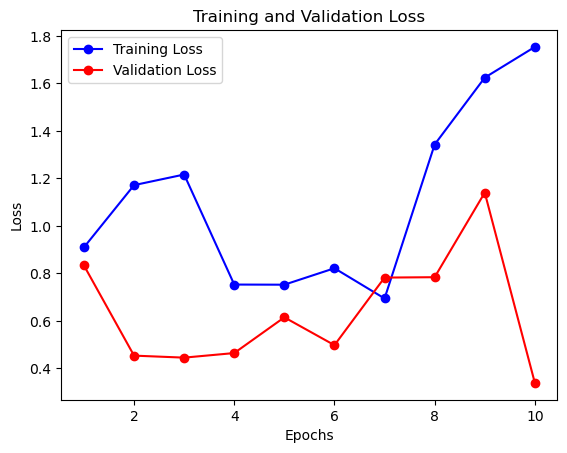

In [138]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))

# Access the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot the loss values
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

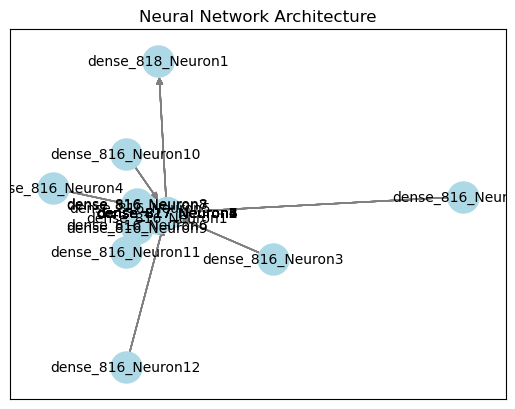

In [139]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True, dpi=300)
G = nx.DiGraph()
# Add nodes for each neuron
for layer in model.layers:
    for i in range(layer.units):
        G.add_node(f'{layer.name}_Neuron{i+1}')

# Add edges between nodes
for i in range(len(model.layers) - 1):
    current_layer = model.layers[i]
    next_layer = model.layers[i+1]
    for j in range(current_layer.units):
        for k in range(next_layer.units):
            G.add_edge(f'{current_layer.name}_Neuron{j+1}', f'{next_layer.name}_Neuron{k+1}')

# Layout the graph
pos = nx.spectral_layout(G)

# Plot the graph
nx.draw_networkx(G, pos, with_labels=True, node_size=500, font_size=10, node_color='lightblue', edge_color='gray', arrows=True)
plt.title('Neural Network Architecture')
plt.show()



In [148]:
Best Epoch: 70
Best Batch Size: 16
Best Accuracy: 0.987500011920929
Best Rate: 0.001
    

SyntaxError: invalid syntax (3406598951.py, line 1)

Epoch 1/1000
10/10 [==============================] - 0s 4ms/step - loss: 0.0957 - accuracy: 0.9733 - val_loss: 0.1136 - val_accuracy: 0.9700
Epoch 2/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1011 - accuracy: 0.9700 - val_loss: 0.1185 - val_accuracy: 0.9600
Epoch 3/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1384 - accuracy: 0.9333 - val_loss: 0.2259 - val_accuracy: 0.8900
Epoch 4/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1474 - accuracy: 0.9267 - val_loss: 0.1831 - val_accuracy: 0.9100
Epoch 5/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9467 - val_loss: 0.1610 - val_accuracy: 0.9200
Epoch 6/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1227 - accuracy: 0.9467 - val_loss: 0.1687 - val_accuracy: 0.9200
Epoch 7/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1121 - accuracy: 0.9600 - val_loss: 0.1322 - val_accuracy: 0.9500
Epoch 

10/10 [==============================] - 0s 2ms/step - loss: 0.0955 - accuracy: 0.9667 - val_loss: 0.1261 - val_accuracy: 0.9500
Epoch 116/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0976 - accuracy: 0.9600 - val_loss: 0.1881 - val_accuracy: 0.9100
Epoch 117/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9467 - val_loss: 0.1563 - val_accuracy: 0.9300
Epoch 118/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9733 - val_loss: 0.1143 - val_accuracy: 0.9700
Epoch 119/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1029 - accuracy: 0.9833 - val_loss: 0.1100 - val_accuracy: 0.9800
Epoch 120/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1272 - accuracy: 0.9433 - val_loss: 0.1272 - val_accuracy: 0.9800
Epoch 121/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0982 - accuracy: 0.9700 - val_loss: 0.1173 - val_accuracy: 0.9800
Epoch 1

Epoch 172/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0852 - accuracy: 0.9800 - val_loss: 0.1128 - val_accuracy: 0.9700
Epoch 173/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1173 - accuracy: 0.9567 - val_loss: 0.1104 - val_accuracy: 0.9700
Epoch 174/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9700 - val_loss: 0.1390 - val_accuracy: 0.9500
Epoch 175/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9667 - val_loss: 0.1091 - val_accuracy: 0.9800
Epoch 176/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0897 - accuracy: 0.9800 - val_loss: 0.1092 - val_accuracy: 0.9800
Epoch 177/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0944 - accuracy: 0.9700 - val_loss: 0.1295 - val_accuracy: 0.9600
Epoch 178/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9700 - val_loss: 0.1312 - val_accuracy:

Epoch 229/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9867 - val_loss: 0.1115 - val_accuracy: 0.9700
Epoch 230/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0876 - accuracy: 0.9800 - val_loss: 0.1079 - val_accuracy: 0.9800
Epoch 231/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0819 - accuracy: 0.9833 - val_loss: 0.1076 - val_accuracy: 0.9800
Epoch 232/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0918 - accuracy: 0.9700 - val_loss: 0.1277 - val_accuracy: 0.9600
Epoch 233/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0962 - accuracy: 0.9667 - val_loss: 0.1068 - val_accuracy: 0.9800
Epoch 234/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0791 - accuracy: 0.9867 - val_loss: 0.1092 - val_accuracy: 0.9700
Epoch 235/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0862 - accuracy: 0.9733 - val_loss: 0.1068 - val_accuracy:

Epoch 286/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0875 - accuracy: 0.9767 - val_loss: 0.1505 - val_accuracy: 0.9400
Epoch 287/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1009 - accuracy: 0.9633 - val_loss: 0.1246 - val_accuracy: 0.9500
Epoch 288/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0847 - accuracy: 0.9733 - val_loss: 0.1247 - val_accuracy: 0.9500
Epoch 289/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0863 - accuracy: 0.9733 - val_loss: 0.1259 - val_accuracy: 0.9400
Epoch 290/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1101 - accuracy: 0.9533 - val_loss: 0.1777 - val_accuracy: 0.9200
Epoch 291/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1143 - accuracy: 0.9533 - val_loss: 0.1052 - val_accuracy: 0.9800
Epoch 292/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0804 - accuracy: 0.9800 - val_loss: 0.1678 - val_accuracy:

Epoch 343/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9433 - val_loss: 0.1419 - val_accuracy: 0.9400
Epoch 344/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1074 - accuracy: 0.9633 - val_loss: 0.1065 - val_accuracy: 0.9900
Epoch 345/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0830 - accuracy: 0.9767 - val_loss: 0.1056 - val_accuracy: 0.9800
Epoch 346/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0992 - accuracy: 0.9633 - val_loss: 0.1128 - val_accuracy: 0.9800
Epoch 347/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0906 - accuracy: 0.9800 - val_loss: 0.1474 - val_accuracy: 0.9400
Epoch 348/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0989 - accuracy: 0.9667 - val_loss: 0.1148 - val_accuracy: 0.9800
Epoch 349/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0993 - accuracy: 0.9700 - val_loss: 0.1467 - val_accuracy:

Epoch 400/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1132 - accuracy: 0.9433 - val_loss: 0.2471 - val_accuracy: 0.8900
Epoch 401/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1767 - accuracy: 0.9133 - val_loss: 0.1080 - val_accuracy: 0.9700
Epoch 402/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1034 - accuracy: 0.9633 - val_loss: 0.1077 - val_accuracy: 0.9800
Epoch 403/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9867 - val_loss: 0.1315 - val_accuracy: 0.9400
Epoch 404/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0968 - accuracy: 0.9733 - val_loss: 0.1052 - val_accuracy: 0.9800
Epoch 405/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0745 - accuracy: 0.9900 - val_loss: 0.1085 - val_accuracy: 0.9800
Epoch 406/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0735 - accuracy: 0.9933 - val_loss: 0.1193 - val_accuracy:

Epoch 457/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0707 - accuracy: 0.9867 - val_loss: 0.1028 - val_accuracy: 0.9800
Epoch 458/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0753 - accuracy: 0.9833 - val_loss: 0.1024 - val_accuracy: 0.9800
Epoch 459/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0721 - accuracy: 0.9867 - val_loss: 0.1052 - val_accuracy: 0.9800
Epoch 460/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0818 - accuracy: 0.9767 - val_loss: 0.1023 - val_accuracy: 0.9800
Epoch 461/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0696 - accuracy: 0.9833 - val_loss: 0.1166 - val_accuracy: 0.9600
Epoch 462/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0836 - accuracy: 0.9733 - val_loss: 0.1042 - val_accuracy: 0.9800
Epoch 463/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0740 - accuracy: 0.9800 - val_loss: 0.1046 - val_accuracy:

Epoch 514/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1829 - accuracy: 0.9133 - val_loss: 0.2592 - val_accuracy: 0.8700
Epoch 515/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1193 - accuracy: 0.9500 - val_loss: 0.1580 - val_accuracy: 0.9300
Epoch 516/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1036 - accuracy: 0.9633 - val_loss: 0.1168 - val_accuracy: 0.9800
Epoch 517/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0759 - accuracy: 0.9767 - val_loss: 0.1080 - val_accuracy: 0.9800
Epoch 518/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0677 - accuracy: 0.9833 - val_loss: 0.1159 - val_accuracy: 0.9700
Epoch 519/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0815 - accuracy: 0.9833 - val_loss: 0.1027 - val_accuracy: 0.9900
Epoch 520/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9733 - val_loss: 0.1041 - val_accuracy:

Epoch 571/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0891 - accuracy: 0.9567 - val_loss: 0.2215 - val_accuracy: 0.9000
Epoch 572/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0904 - accuracy: 0.9733 - val_loss: 0.1086 - val_accuracy: 0.9700
Epoch 573/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9867 - val_loss: 0.1190 - val_accuracy: 0.9500
Epoch 574/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0751 - accuracy: 0.9800 - val_loss: 0.1075 - val_accuracy: 0.9700
Epoch 575/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0858 - accuracy: 0.9667 - val_loss: 0.1109 - val_accuracy: 0.9800
Epoch 576/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0947 - accuracy: 0.9533 - val_loss: 0.1055 - val_accuracy: 0.9800
Epoch 577/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0675 - accuracy: 0.9833 - val_loss: 0.1130 - val_accuracy:

Epoch 628/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1161 - accuracy: 0.9433 - val_loss: 0.1319 - val_accuracy: 0.9500
Epoch 629/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1195 - accuracy: 0.9467 - val_loss: 0.1232 - val_accuracy: 0.9600
Epoch 630/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0777 - accuracy: 0.9800 - val_loss: 0.1061 - val_accuracy: 0.9800
Epoch 631/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0665 - accuracy: 0.9900 - val_loss: 0.0998 - val_accuracy: 0.9800
Epoch 632/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0660 - accuracy: 0.9867 - val_loss: 0.0995 - val_accuracy: 0.9800
Epoch 633/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0773 - accuracy: 0.9833 - val_loss: 0.1181 - val_accuracy: 0.9600
Epoch 634/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0901 - accuracy: 0.9667 - val_loss: 0.1158 - val_accuracy:

Epoch 685/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0732 - accuracy: 0.9733 - val_loss: 0.1556 - val_accuracy: 0.9300
Epoch 686/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0778 - accuracy: 0.9767 - val_loss: 0.1018 - val_accuracy: 0.9800
Epoch 687/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0716 - accuracy: 0.9767 - val_loss: 0.0998 - val_accuracy: 0.9800
Epoch 688/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0802 - accuracy: 0.9800 - val_loss: 0.1026 - val_accuracy: 0.9900
Epoch 689/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0760 - accuracy: 0.9800 - val_loss: 0.1201 - val_accuracy: 0.9600
Epoch 690/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1335 - accuracy: 0.9267 - val_loss: 0.1843 - val_accuracy: 0.9200
Epoch 691/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1152 - accuracy: 0.9400 - val_loss: 0.0994 - val_accuracy:

Epoch 742/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9700 - val_loss: 0.1708 - val_accuracy: 0.9300
Epoch 743/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0925 - accuracy: 0.9567 - val_loss: 0.1205 - val_accuracy: 0.9600
Epoch 744/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0715 - accuracy: 0.9767 - val_loss: 0.0993 - val_accuracy: 0.9800
Epoch 745/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0612 - accuracy: 0.9833 - val_loss: 0.1006 - val_accuracy: 0.9800
Epoch 746/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0651 - accuracy: 0.9867 - val_loss: 0.1041 - val_accuracy: 0.9700
Epoch 747/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0585 - accuracy: 0.9867 - val_loss: 0.1009 - val_accuracy: 0.9900
Epoch 748/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0649 - accuracy: 0.9833 - val_loss: 0.1098 - val_accuracy:

Epoch 799/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0772 - accuracy: 0.9733 - val_loss: 0.1074 - val_accuracy: 0.9700
Epoch 800/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0752 - accuracy: 0.9733 - val_loss: 0.1062 - val_accuracy: 0.9700
Epoch 801/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0723 - accuracy: 0.9700 - val_loss: 0.1005 - val_accuracy: 0.9800
Epoch 802/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9567 - val_loss: 0.0994 - val_accuracy: 0.9900
Epoch 803/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0599 - accuracy: 0.9867 - val_loss: 0.1595 - val_accuracy: 0.9400
Epoch 804/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0889 - accuracy: 0.9600 - val_loss: 0.1011 - val_accuracy: 0.9900
Epoch 805/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0592 - accuracy: 0.9933 - val_loss: 0.0983 - val_accuracy:

Epoch 856/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9567 - val_loss: 0.1156 - val_accuracy: 0.9800
Epoch 857/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0693 - accuracy: 0.9867 - val_loss: 0.0976 - val_accuracy: 0.9800
Epoch 858/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0656 - accuracy: 0.9867 - val_loss: 0.1129 - val_accuracy: 0.9700
Epoch 859/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0593 - accuracy: 0.9833 - val_loss: 0.0974 - val_accuracy: 0.9800
Epoch 860/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0607 - accuracy: 0.9867 - val_loss: 0.0986 - val_accuracy: 0.9900
Epoch 861/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0575 - accuracy: 0.9900 - val_loss: 0.0990 - val_accuracy: 0.9900
Epoch 862/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0650 - accuracy: 0.9833 - val_loss: 0.1012 - val_accuracy:

Epoch 913/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0958 - accuracy: 0.9567 - val_loss: 0.1656 - val_accuracy: 0.9300
Epoch 914/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.1031 - accuracy: 0.9600 - val_loss: 0.1629 - val_accuracy: 0.9300
Epoch 915/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0974 - accuracy: 0.9600 - val_loss: 0.1008 - val_accuracy: 0.9800
Epoch 916/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0821 - accuracy: 0.9567 - val_loss: 0.1046 - val_accuracy: 0.9700
Epoch 917/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0870 - accuracy: 0.9633 - val_loss: 0.1202 - val_accuracy: 0.9600
Epoch 918/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0704 - accuracy: 0.9767 - val_loss: 0.0981 - val_accuracy: 0.9900
Epoch 919/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0748 - accuracy: 0.9633 - val_loss: 0.0969 - val_accuracy:

Epoch 970/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 0.9867 - val_loss: 0.0988 - val_accuracy: 0.9900
Epoch 971/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0549 - accuracy: 0.9933 - val_loss: 0.1129 - val_accuracy: 0.9800
Epoch 972/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.1004 - val_accuracy: 0.9900
Epoch 973/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0617 - accuracy: 0.9833 - val_loss: 0.0998 - val_accuracy: 0.9800
Epoch 974/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0622 - accuracy: 0.9833 - val_loss: 0.0966 - val_accuracy: 0.9800
Epoch 975/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0529 - accuracy: 0.9867 - val_loss: 0.1180 - val_accuracy: 0.9500
Epoch 976/1000
10/10 [==============================] - 0s 2ms/step - loss: 0.0682 - accuracy: 0.9733 - val_loss: 0.1073 - val_accuracy:

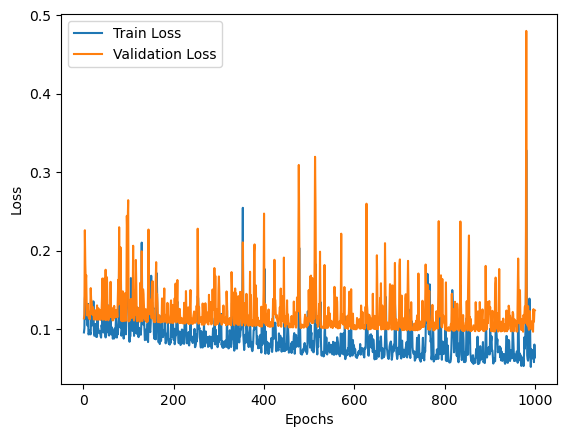

In [244]:
import matplotlib.pyplot as plt

# Train your model and obtain the history object
history = model.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test))

# Get the loss values from the history object
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Get the number of epochs
epochs = range(1, len(train_loss) + 1)

# Plot the loss values
plt.plot(epochs, train_loss, label='Train Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig('epoches.png')
plt.show()